# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# Load Wine Quality dataset
WHITE_WINE_QUALITY_DATASET = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz"

# Load dataset into a dataframe
df = pd.read_csv(WHITE_WINE_QUALITY_DATASET, sep="\t")

# Random sample of 10 rows
df.sample(10)

# Reproducible Random Sample
# df.sample(10, random_state=67) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4174,6.3,0.240,0.22,11.90,0.050,65.0,179.0,0.99659,3.06,0.58,9.3,6
4649,5.7,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,5
265,6.9,0.290,0.40,19.45,0.043,36.0,156.0,0.99960,2.93,0.47,8.9,5
1255,6.4,0.220,0.34,1.80,0.057,29.0,104.0,0.99590,3.81,0.57,10.3,6
3944,6.1,0.270,0.32,6.20,0.048,47.0,161.0,0.99281,3.22,0.60,11.0,6
1061,7.0,0.210,0.28,7.50,0.070,45.0,185.0,0.99660,3.34,0.55,9.4,5
2217,8.1,0.250,0.38,3.80,0.051,18.0,129.0,0.99280,3.21,0.38,11.5,6
4277,7.2,0.220,0.35,5.50,0.054,37.0,183.0,0.99474,3.08,0.50,10.3,5
3744,7.0,0.150,0.28,14.70,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,7
3977,6.9,0.270,0.25,7.50,0.030,18.0,117.0,0.99116,3.09,0.38,13.0,6


I selected the Wine Quality (white) dataset from PMLB. I loaded the data from the compressed TSV using pandas, and took a random sample of 10 rows which is displayed above. The target column is named `quality`, and all other columns are treated as input features. I also included a commented out version of the random sample code which implements a random state so that the "random" data can be reproduced consistently.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# List all column names in dataframe
cols = list(df.columns)
print(f"Columns ({len(cols)}):")
for i, c in enumerate(cols, start=1):
    print(f"{i}. {c}")

Columns (12):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. target


Below are brief descriptions for each column in the White_Wine_Quality dataset:

- `fixed acidity`: Refers to the non-volatile acids in wine—mainly tartaric and malic acid—that do not evaporate easily. These acids influence the wine’s overall sourness, structure, and stability.
- `volatile acidity`: Measures acids that can evaporate, mainly acetic acid (associated with vinegar smell). High values can lead to unpleasant vinegar-like aromas, so lower levels are preferred for quality.
- `citric acid`: A weak acid naturally present in small amounts. Adds freshness, “brightness”, and enhances the wine’s flavor and aroma when present at moderate levels.
- `residual sugar`: Amount of sugar left after fermentation (in g/L). Higher values indicate sweeter wines; lower values correspond to dry wines. White wines often vary widely in this measurement.
- `chlorides`: Represents the amount of salt in the wine (mostly sodium chloride) (in g/L). High chloride levels can negatively affect taste.
- `free sulfur dioxide`: SO2 that is not chemically bound (in mg/L)) and is available to act as an antimicrobial and antioxidant. Too much can impact aroma; too little may allow spoilage.
- `total sulfur dioxide`: Total amount of SO2 (free + bound). High levels may affect smell/taste; low levels may harm preservation.
- `density`: Liquid density (g/cm³); Density of the wine relative to water. Highly related to sugar and alcohol content: more sugar or less alcohol increases density.
- `pH`: Acidity level of the wine, measured on the pH scale. Lower pH = more acidic, which influences taste, preservation, and color stability.
- `sulphates`: Amount of potassium sulfate added, often used as a wine preservative. Linked to SO2 production, which affects freshness and microbial stability.
- `alcohol`: Alcohol percentage by volume (% ABV). Generally, higher alcohol levels increase the wine's body, warmth, and often its quality rating.
- `quality`: Our Target Variable! This is a sensory score assigned by trained wine experts. It represents an ordinal scale where 0 = very bad and 10 = excellent.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

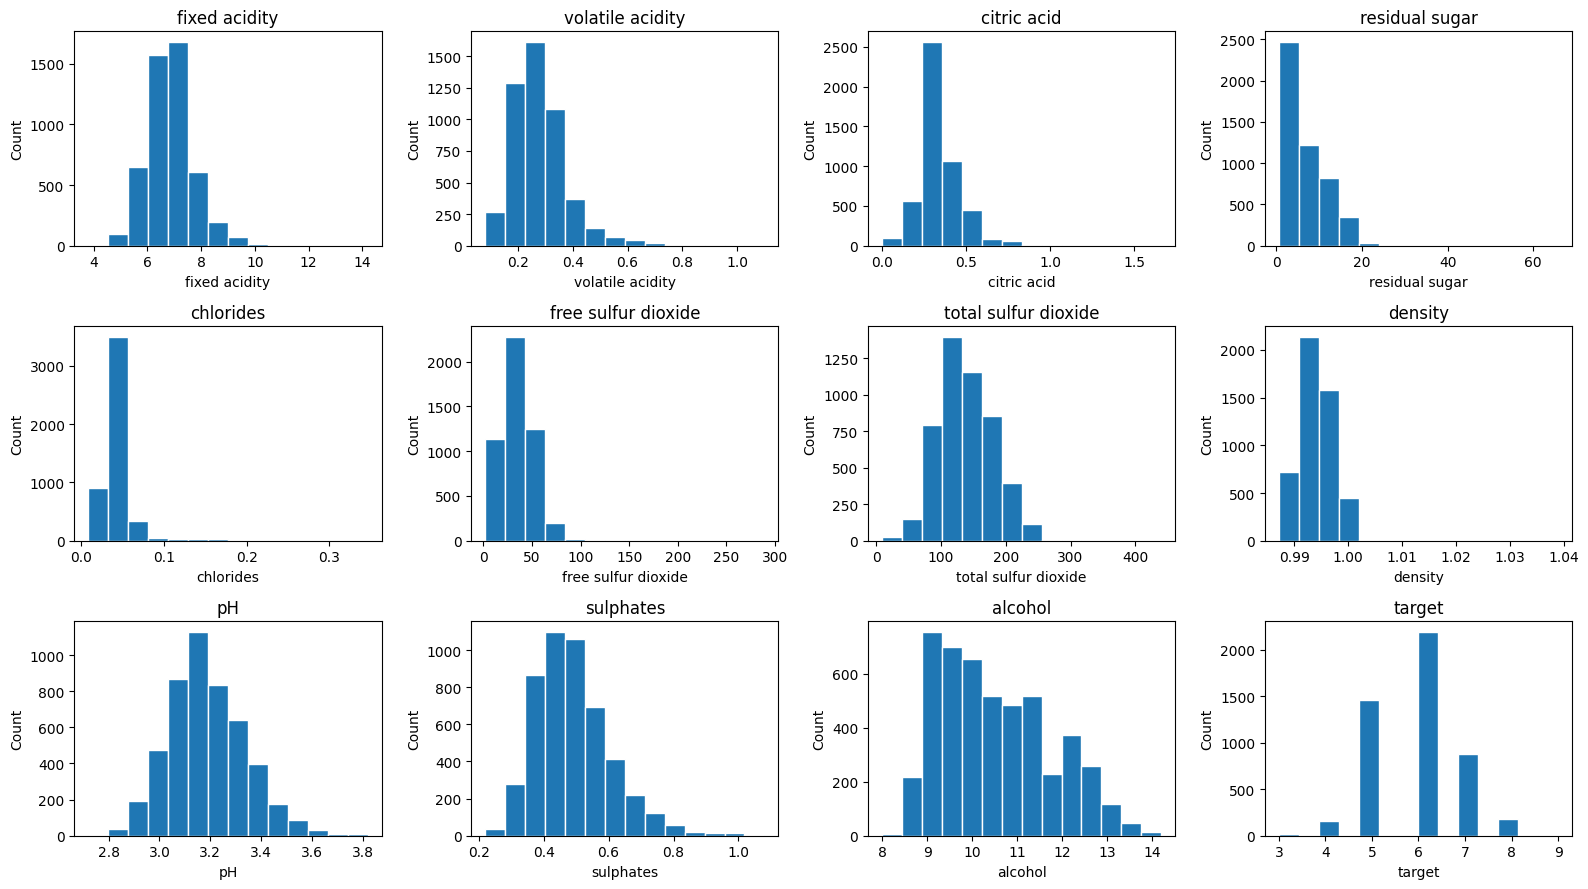

In [28]:
# Separate inputs and target
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]
ALL_COLS = FEATURE_COLS + [TARGET_COL]

# Plot subplot grid
n = len(ALL_COLS)
cols = 4
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(16, 9))
axes = np.array(axes).reshape(rows, cols)

for idx, col in enumerate(ALL_COLS):
    r, c = divmod(idx, cols)
    ax = axes[r, c]
    valid = df[col].dropna()
    ax.hist(valid, bins=14, edgecolor="white")
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

fig.tight_layout()
plt.show()

Each of the columns has a distinct distribution which I have reasoned below:
- `fixed acidity`: Approximately normal with a slight right skew.
- `volatile acidity`: Right-skewed
- `citric acid`: Right-skewed
- `residual sugar`: Heavy right skew
- `chlorides`: Right-skewed
- `free sulfur dioxide`: Right-skewed
- `total sulfur dioxide`: Right-skewed
- `density`: roughly symmetric, tight normal distribution with slight left skew.
- `pH`: Roughly symmetric, normal, slightly right-skewed.
- `sulphates`: Right-skewed
- `alcohol`: Slight right skew
- `target`: Roughly normal, discrete, non-continuous distribution.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

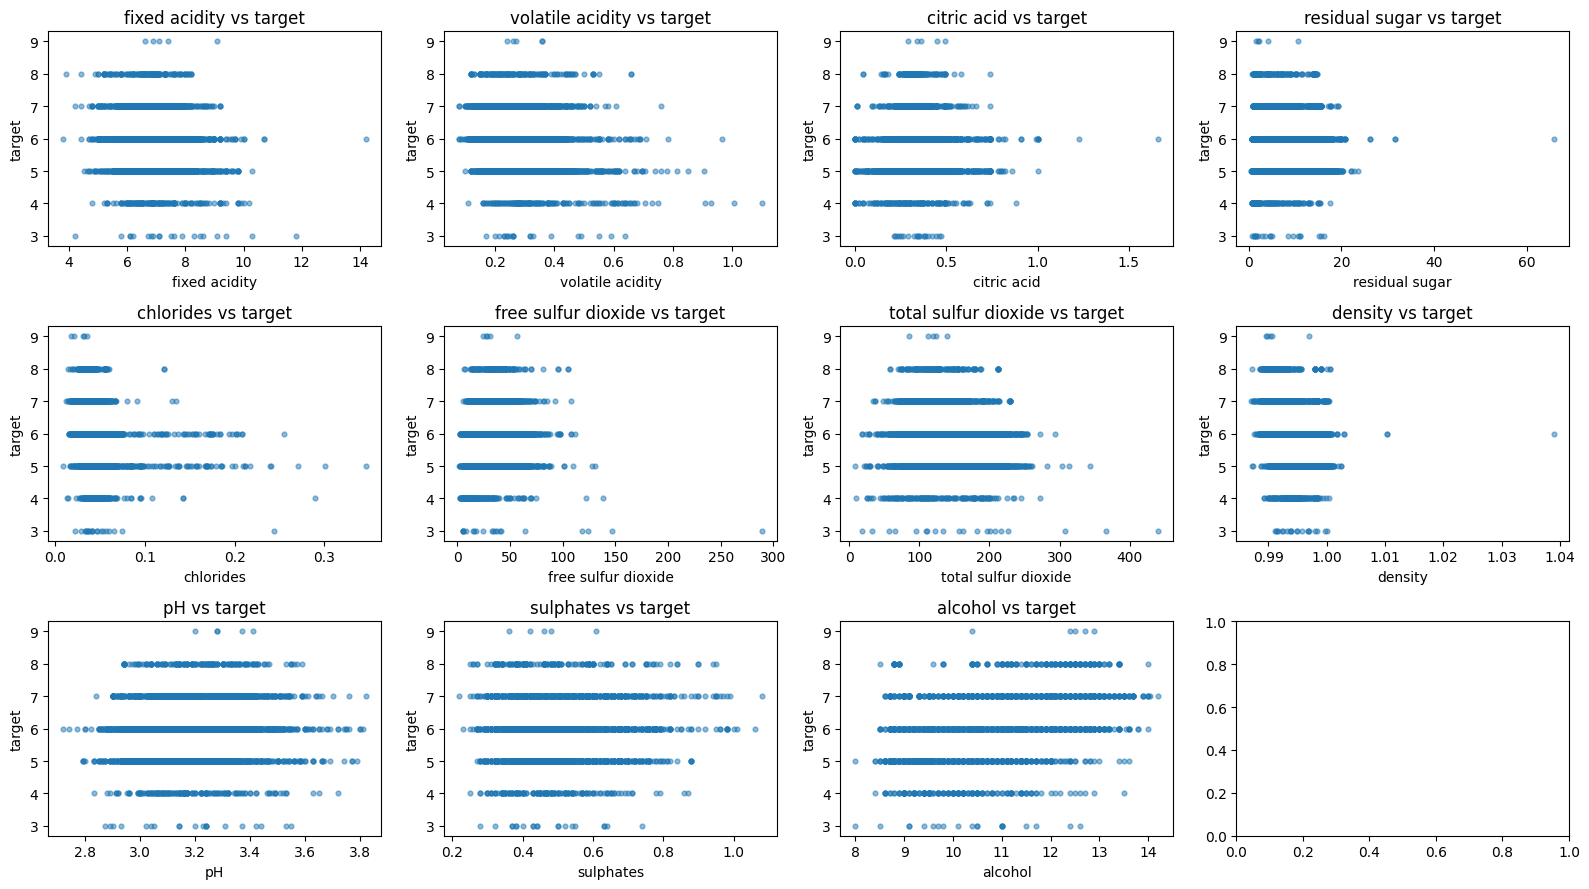

In [6]:
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]

n = len(FEATURE_COLS)
cols = 4
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(16, 9))
axes = np.array(axes).reshape(rows, cols)

for idx, col in enumerate(FEATURE_COLS):
    r, c = divmod(idx, cols)
    ax = axes[r, c]
    ax.scatter(df[col], df[TARGET_COL], s=12, alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel("target")
    ax.set_title(f"{col} vs target")

fig.tight_layout()
plt.show()

Shown by the scatter plots above, most of the features show no strong relationship with wine quality, mainly due to the fact that all of the points form horizontal bands across the different "quality" levels (target). 

- `fixed acidity`: Independent. Wines with all levels of fixed acidity appear in almost all quality ratings.
- `volatile acidity`: Weak negative relationship. Higher quality wines tend to have slihglty lower volatile acidity. From the data, it is possible to conclude that volatile acidity may have a small impact on quality rating.
- `citric acid`: Independent. Higher quality wines seem slightly more likely to have a lower citric acid content but the relatioonship is very scattered and there exist lower quality wines with low citric acid ratings as well.
- `residual sugar`: Independent. No visible trend, quality ratings are spread pretty evenly across all levels of residual sugar.
- `chlorides`: Weak Negative Relationship. At higher chloride levels, wine quality appears slightly lower, however the effect seems small.
- `free sulfur dioxide`: Independent. The data is extremely scattered and does not show any trends.
- `total sulfur dioxide`: Independent. The data is extremely scattered and does not show any trends.
- `density`: Weak negative relationship. Higher quality wines seem to tend to cluster at slightly lower densities, but the variation is small.
- `pH`: Independent. The data is extremely scattered and does not show any trends.
- `sulphates`: Weak positive relationship. It seems that higher sulphates are very slightly associated with better quality, however the highest quality wines seem to tend towards the lower side.
- `alcohol`: Moderately Related. This seems to be one of the clearest trends of all the features. The data seems to show that wines with a higher alcohol content tend to have higher quality ratings.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

OLS with all features — MSE: 0.5632


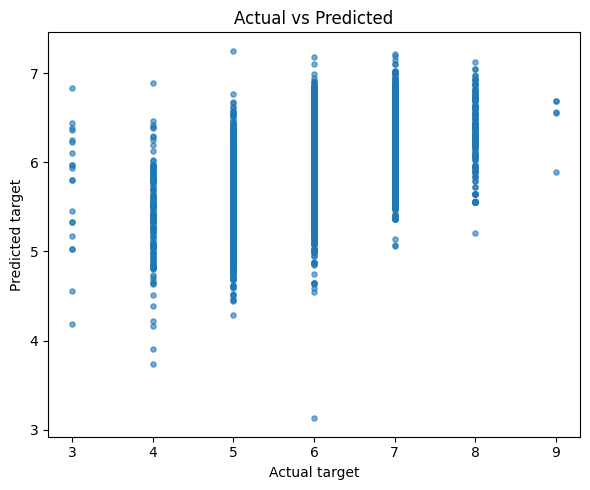

In [7]:
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]

# Covert Pandas DF to NumPy arrays
X = df[FEATURE_COLS].to_numpy()
y = df[TARGET_COL].to_numpy()

# Fit Ordinary Least Squares Regression
ols = sklearn.linear_model.LinearRegression()
ols.fit(X, y)

# Predictions and Mean Squared Error
y_pred = ols.predict(X)
mse = np.mean((y - y_pred) ** 2)
print(f"OLS with all features — MSE: {mse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, s=14, alpha=0.6)
plt.xlabel("Actual target")
plt.ylabel("Predicted target")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

Analysis of OLS results:

- MSE: 0.5632 → RMSE = sqrt(0.5632) = 0.750. On the `quality` scale, this indicates an average prediction deviation of about 0.75, which is a reasonable but not perfect fit for a simple linear model.

From the plot and the RMSE it might be reasonable to conclude the the OLS regression does a reasonable job at predicting the target values. However, in the extreme cases, where target is either very low, or very high, the error is much more pronounced. This could likely be due to a lack of data on wines that are of the lowest and highest quality, or it might simply be that the OLS regression is not the best model to use for this specific dataset.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


Best single predictor: alcohol
Single-feature MSE: 0.6354 (vs full model MSE 0.5632)
Coefficient: 0.3135, Intercept: 2.5820


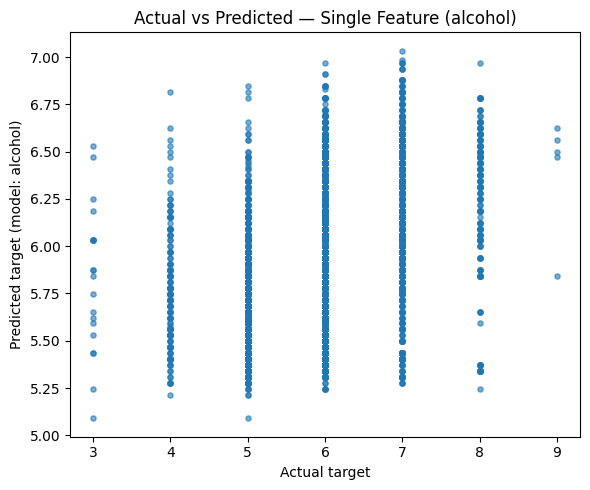

Top 5 single-feature MSEs:
  alcohol: 0.6354
  density: 0.7102
  chlorides: 0.7496
  volatile acidity: 0.7545
  total sulfur dioxide: 0.7603


In [8]:
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]

full_mse = 0.5632  # from Problem 5

# Linear regression with single features
results = []
for col in FEATURE_COLS:
    X1 = df[[col]].to_numpy()
    y = df[TARGET_COL].to_numpy()
    lr = sklearn.linear_model.LinearRegression()
    lr.fit(X1, y)
    y_pred = lr.predict(X1)
    mse = np.mean((y - y_pred) ** 2)
    results.append((col, mse, float(lr.coef_[0]), float(lr.intercept_)))

# Sort by MSE (ascending)
results.sort(key=lambda x: x[1])

# Print best single predictor
best_col, best_mse, best_coef, best_intercept = results[0]
print(f"Best single predictor: {best_col}")
print(f"Single-feature MSE: {best_mse:.4f} (vs full model MSE {full_mse:.4f})")
print(f"Coefficient: {best_coef:.4f}, Intercept: {best_intercept:.4f}")

# Plot actual vs predicted for best single feature
X_best = df[[best_col]].to_numpy()
y = df[TARGET_COL].to_numpy()
y_pred_best = sklearn.linear_model.LinearRegression().fit(X_best, y).predict(X_best)

plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred_best, s=14, alpha=0.6)
plt.xlabel("Actual target")
plt.ylabel(f"Predicted target (model: {best_col})")
plt.title(f"Actual vs Predicted — Single Feature ({best_col})")
plt.tight_layout()
plt.show()

# Print top 5 single-feature models for context
print("Top 5 single-feature MSEs:")
for col, mse, _, _ in results[:5]:
    print(f"  {col}: {mse:.4f}")

Comparison to Problem 5:

The best single-feature linear model uses `alcohol` with MSE = 0.6354, compared to the full OLS model MSE = 0.5632 (RMSE ≈ 0.75). As expected, the single-feature model has higher error than the multi-feature model. The single-feature plot shows a narrower prediction range and more systematic miss at the extremes (lowest and highest qualities), mirroring Problem 5 but amplified due to relying on a single predictor.

The single-feature model is easy to interpret — coefficient for `alcohol` = 0.3135 and intercept = 2.5820 — but it sacrifices accuracy. The full model combines signals from multiple features to reduce residual structure the single-feature model cannot capture. Both exhibit increased error at very low/high quality values, suggesting either data sparsity at extremes or that a more flexible model (nonlinear or interactions) could help.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Threshold t for alcohol: 10.400
Counts: alcohol < t: 2420, alcohol ≥ t: 2478


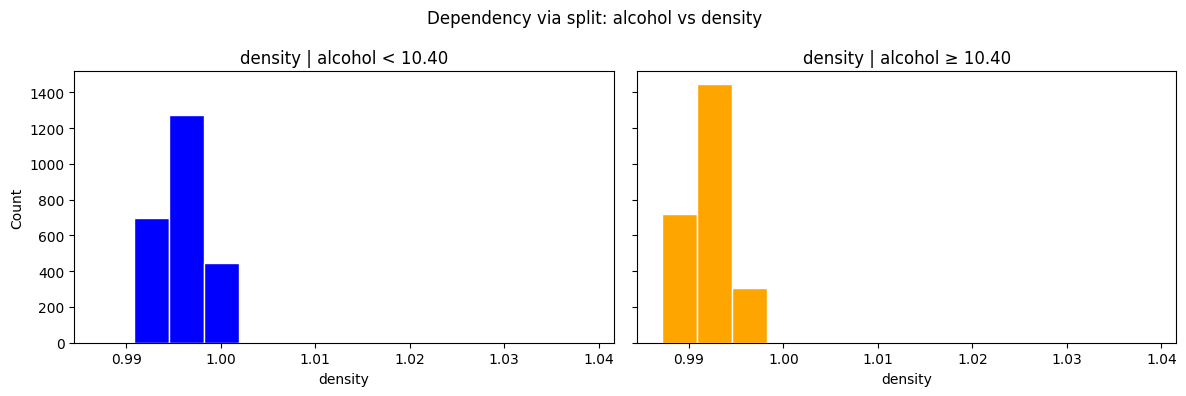

In [24]:
# Identifying a visibly dependent pair: alcohol vs density
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]

x_col = "alcohol"
y_col = "density"

# Compute threshold 't' using median
t = float(np.median(df[x_col].to_numpy()))

# Split data
t_low = df[x_col] < t
t_high = df[x_col] >= t

low_vals = df.loc[t_low, y_col].dropna().to_numpy()
high_vals = df.loc[t_high, y_col].dropna().to_numpy()

# Ensure enough data on both sides
n_low, n_high = len(low_vals), len(high_vals)
print(f"Threshold t for {x_col}: {t:.3f}")
print(f"Counts: {x_col} < t: {n_low}, {x_col} ≥ t: {n_high}")

# Shared axis settings and common bins computed from combined range
all_vals = np.concatenate([low_vals, high_vals])
min_v, max_v = float(all_vals.min()), float(all_vals.max())

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].hist(low_vals, bins=14, range=(min_v, max_v), color='blue', edgecolor="white")
axes[0].set_title(f"{y_col} | {x_col} < {t:.2f}")
axes[0].set_xlabel(y_col)
axes[0].set_ylabel("Count")

axes[1].hist(high_vals, bins=14, range=(min_v, max_v), color='orange', edgecolor="white")
axes[1].set_title(f"{y_col} | {x_col} ≥ {t:.2f}")
axes[1].set_xlabel(y_col)

fig.suptitle(f"Dependency via split: {x_col} vs {y_col}")
fig.tight_layout()
plt.show()

Dependency analysis on alcohol and density using alcohol split:

- Split feature: `alcohol` at median threshold `t = 10.40` to ensure balanced groups.
- Group sizes: `alcohol < t` = 2420, `alcohol ≥ t` = 2478 which are both sufficiently large to reduce noise concerns.
- Compared variable: `density`. The histograms show a clear shift: higher alcohol is associated with lower density, consistent with physical chemistry where ethanol lowers solution density.
- Shared axes: Both histograms use identical `density` range and binning for direct visual comparison.

From the two histograms, it is evident that `density` depends on `alcohol` in this dataset. A higher alcohol wines tend to have measurably lower density. The split-histogram view and KS test together make the dependency clear and statistically significant.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Number of features: 11; Using first-half PCs: 5
Variance explained by first-half PCs: 0.7283
PCA-regression MSE (first-half PCs): 0.6448
Comparison: full OLS MSE: 0.5632 vs PCA-regression MSE: 0.6448


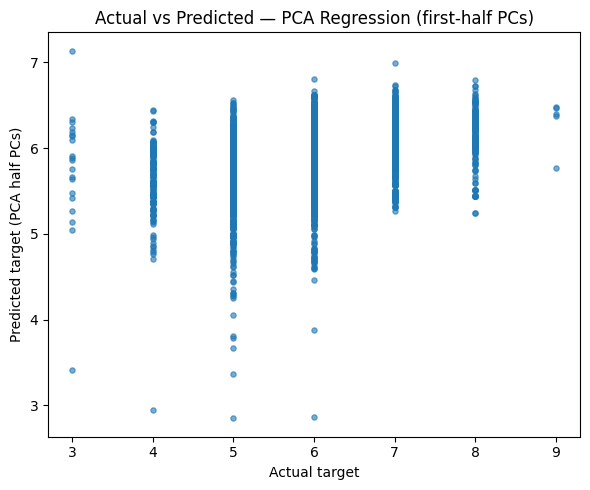

In [32]:
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]

# Prepare X (inputs) and y (target)
X = df[FEATURE_COLS].to_numpy()
y = df[TARGET_COL].to_numpy()

# Standardize inputs for PCA (center + scale)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=0)
X_scaled = (X - X_mean) / X_std

# Fit PCA and get explained variance ratios
pca = PCA()
pca.fit(X_scaled)
explained = pca.explained_variance_ratio_

# First half of PCs
n_features = X.shape[1]
half_k = max(1, n_features // 2)
X_pcs = pca.transform(X_scaled)
X_half = X_pcs[:, :half_k]

# Report cumulative variance explained by first half PCA scores
var_half = explained[:half_k].sum()
print(f"Number of features: {n_features}; Using first-half PCs: {half_k}")
print(f"Variance explained by first-half PCs: {var_half:.4f}")

# Regress target using first-half PCA scores
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_half, y)
y_pred = lr.predict(X_half)
mse_pca = np.mean((y - y_pred) ** 2)
print(f"PCA-regression MSE (first-half PCs): {mse_pca:.4f}")

# Compare to full-model MSE
full_mse = 0.5632  # from Problem 5
print(f"Comparison: full OLS MSE: {full_mse:.4f} vs PCA-regression MSE: {mse_pca:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, s=14, alpha=0.6)
plt.xlabel("Actual target")
plt.ylabel("Predicted target (PCA half PCs)")
plt.title("Actual vs Predicted — PCA Regression (first-half PCs)")
plt.tight_layout()
plt.show()

PCA results and regression analysis:

- PCs used: First half of components (5 of 11). Cumulative variance explained = 0.7283, indicating these PCs capture ~73% of input variation.
- PCA regression MSE: 0.6448 vs full OLS MSE: 0.5632. The PCA-based model is less accurate than the full-feature OLS on this dataset.
- Interpretation: Dimensionality reduction preserves most variance but does not necessarily optimize for target prediction. Some predictive signal may lie in lower-variance directions or in combinations better captured by original features.
- Plot analysis: Actual vs predicted shows compressed spread with systematic miss at extremes, similar to Problem 5 but slightly worse.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]

# Compute Pearson correlation matrix among inputs
corr = df[FEATURE_COLS].corr(method="pearson").to_numpy()
cols = FEATURE_COLS

# Find highest absolute off-diagonal correlation
best_pair = None
best_val = -1.0
n = len(cols)
for i in range(n):
    for j in range(i + 1, n):
        val = abs(corr[i, j])
        if val > best_val:
            best_val = val
            best_pair = (cols[i], cols[j], corr[i, j])

c1, c2, corr_val = best_pair
print(f"Highest correlation pair: {c1} and {c2}")
print(f"Pearson correlation: {corr_val:.4f} (abs={abs(corr_val):.4f})")

# Examine loadings for top PCs
X = df[FEATURE_COLS].to_numpy()
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=0)
X_scaled = (X - X_mean) / X_std
pca = PCA()
pca.fit(X_scaled)

components = pca.components_
explained = pca.explained_variance_ratio_

# Identify which PC most strongly captures the pair by combined absolute loading
pair_idx = (cols.index(c1), cols.index(c2))
best_pc = None
best_pc_score = -1.0
for pc_idx, loadings in enumerate(components):
    score = abs(loadings[pair_idx[0]]) + abs(loadings[pair_idx[1]])
    if score > best_pc_score:
        best_pc_score = score
        best_pc = pc_idx

print(f"PC capturing the pair most: PC{best_pc+1} with combined loading {best_pc_score:.4f}")
print(f"Variance explained by PC{best_pc+1}: {explained[best_pc]:.4f}")
print(f"Loadings on PC{best_pc+1}: {c1}={components[best_pc][pair_idx[0]]:.4f}, {c2}={components[best_pc][pair_idx[1]]:.4f}")

Highest correlation pair: residual sugar and density
Pearson correlation: 0.8390 (abs=0.8390)
PC capturing the pair most: PC11 with combined loading 1.2500
Variance explained by PC11: 0.0019
Loadings on PC11: residual sugar=-0.4902, density=0.7598


Correlation and PCA reflection:

- Highest correlated inputs: `residual sugar` and `density` with Pearson r = 0.8390. This strong positive correlation is consistent with chemistry: more sugar increases solution density.
- PCA reflection: The pair is primarily captured by PC11 (combined loading ≈ 1.2500), with loadings `residual sugar = -0.4902`, `density = 0.7598`. Although PC11 explains a small fraction of variance (≈ 0.0019), it isolates this specific co-variation direction — indicating that while the correlation is strong locally between these two features, the overall dataset’s variance is dominated by other axes.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Features used: 11; chi-square(0.999, df=11) threshold = 31.26
Top outlier candidate index = 2781; MD^2 = 1740.05 (MD = 41.71); above threshold? True

Outlier row values:
fixed acidity             7.80000
volatile acidity          0.96500
citric acid               0.60000
residual sugar           65.80000
chlorides                 0.07400
free sulfur dioxide       8.00000
total sulfur dioxide    160.00000
density                   1.03898
pH                        3.39000
sulphates                 0.69000
alcohol                  11.70000
target                    6.00000
Name: 2781, dtype: float64


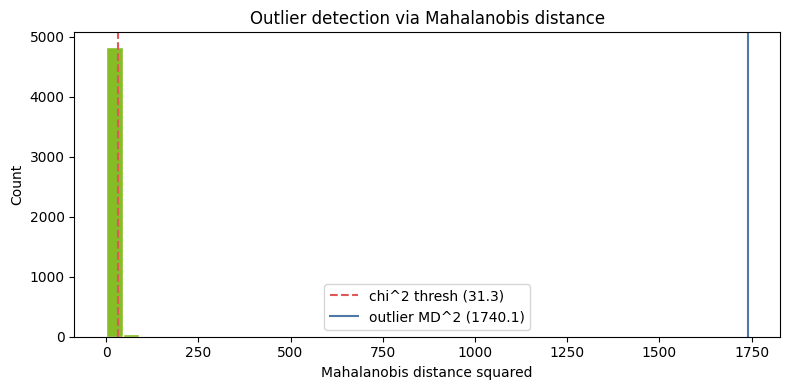

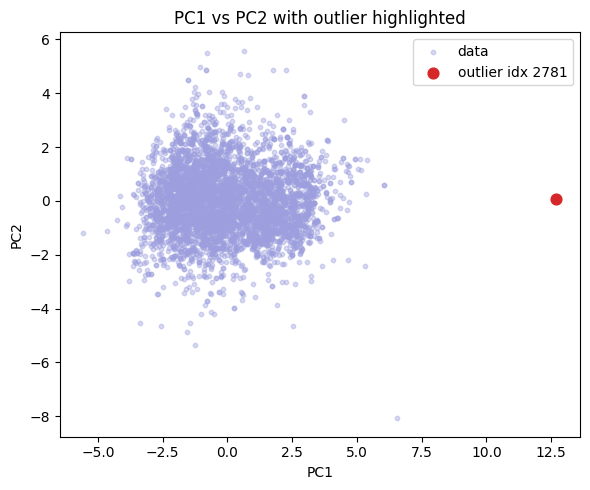

In [37]:
TARGET_COL = "target"
FEATURE_COLS = [c for c in df.columns if c != TARGET_COL]

# Matrix of inputs
X = df[FEATURE_COLS].to_numpy()

# Standardize features (z-scores)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=0)
X_std_safe = np.where(X_std == 0, 1.0, X_std)
X_scaled = (X - X_mean) / X_std_safe

# Mahalanobis distance using sample covariance of standardized features
S = np.cov(X_scaled, rowvar=False, ddof=1)
S_inv = np.linalg.pinv(S)  # pseudo-inverse for numerical stability
center = X_scaled.mean(axis=0)

def mahalanobis2(row):
    d = row - center
    return float(d @ S_inv @ d.T)

md2 = np.apply_along_axis(mahalanobis2, 1, X_scaled)
md = np.sqrt(md2)

# Chi-square threshold (very strict) with dof = number of features
from scipy.stats import chi2
k = X.shape[1]
alpha = 0.001
chi2_thresh = chi2.ppf(1 - alpha, df=k)

# Pick top outlier by MD^2 and check against threshold
idx_out = int(np.argmax(md2))
md2_out = float(md2[idx_out])
md_out = float(md[idx_out])
passed_thresh = md2_out > chi2_thresh

print(f"Features used: {k}; chi-square(0.999, df={k}) threshold = {chi2_thresh:.2f}")
print(f"Top outlier candidate index = {idx_out}; MD^2 = {md2_out:.2f} (MD = {md_out:.2f}); above threshold? {passed_thresh}")

# Show the row values for context
row_vals = df.iloc[idx_out][FEATURE_COLS + [TARGET_COL]] if TARGET_COL in df.columns else df.iloc[idx_out][FEATURE_COLS]
print("\nOutlier row values:")
print(row_vals)

# Visualization 1: Histogram of MD^2 with threshold and outlier marker
plt.figure(figsize=(8, 4))
plt.hist(md2, bins=40, color="#86bc25", edgecolor="white")
plt.axvline(chi2_thresh, color="#e15759", linestyle="--", label=f"chi^2 thresh ({chi2_thresh:.1f})")
plt.axvline(md2_out, color="#4e79a7", linestyle="-", label=f"outlier MD^2 ({md2_out:.1f})")
plt.xlabel("Mahalanobis distance squared")
plt.ylabel("Count")
plt.title("Outlier detection via Mahalanobis distance")
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 2: PCA scatter (first two PCs) with outlier highlighted
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)
plt.figure(figsize=(6, 5))
plt.scatter(pcs[:, 0], pcs[:, 1], s=10, alpha=0.4, label="data", color="#9c9ede")
plt.scatter(pcs[idx_out, 0], pcs[idx_out, 1], s=60, color="#d62728", label=f"outlier idx {idx_out}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2 with outlier highlighted")
plt.legend()
plt.tight_layout()
plt.show()

Outlier identification criteria and result:

- Criterion: Mahalanobis distance (MD) on standardized input features using sample covariance. Threshold set via chi-square quantile with df = 11 (number of features) at 0.999 (strict) → χ² ≈ 31.26.
- Selected row: index 2781 with MD² = 1740.05 (MD = 41.71), far exceeding the threshold. Key values: residual sugar = 65.8 g/L, density = 1.03898 — both extreme for this dataset and physically consistent with high sugar raising density.
- Evidence:
  - MD² histogram: the outlier lies far to the right of the χ² threshold, while the bulk of observations cluster near zero.
  - PCA (PC1 vs PC2): the selected row is isolated from the main cloud, confirming multivariate deviation.
- Explanation: MD accounts for feature scale and correlation structure, so this row is not just extreme in one variable but unusual given the joint distribution. The extraordinary residual sugar and density jointly drive its outlier status.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE